In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import mpld3

In [67]:
df = pd.read_csv("../../datasets/binance-bitcoin.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Close Time'] = pd.to_datetime(df['Close Time'], format='mixed').dt.strftime('%Y-%m-%d %H:%M:%S')
df['Close Time'] = pd.to_datetime(df['Close Time'], format='%Y-%m-%d %H:%M:%S')

<h3>
<b>
Отрисовка графика с количеством сделок
</b>
</h3>

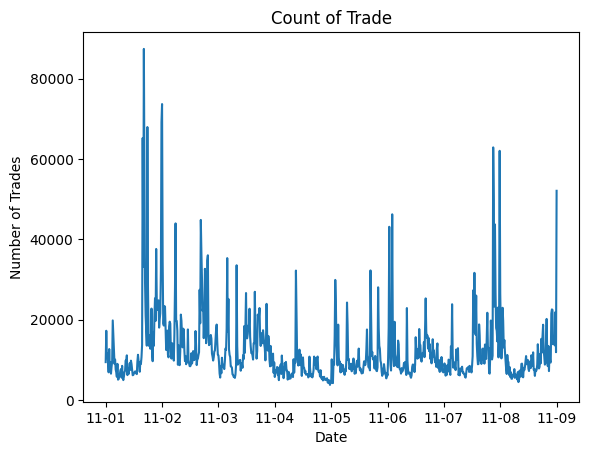

In [30]:
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2023-11-09')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

date_formatter = mdates.DateFormatter('%m-%d')

plt.gca().xaxis.set_major_formatter(date_formatter)

plt.plot(filtered_df['Date'], filtered_df['Number of Trades'])
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.title('Count of Trade')

# Создайте всплывающую подсказку с информацией о точной цене
tooltip = mpld3.plugins.PointLabelTooltip(plt.gca(), labels=np.round(filtered_df['Number of Trades'], 2).astype(str).tolist())
mpld3.plugins.connect(plt.gcf(), tooltip)

<h3>
<b>
Отрисовка графика цены Close
</b>
</h3>

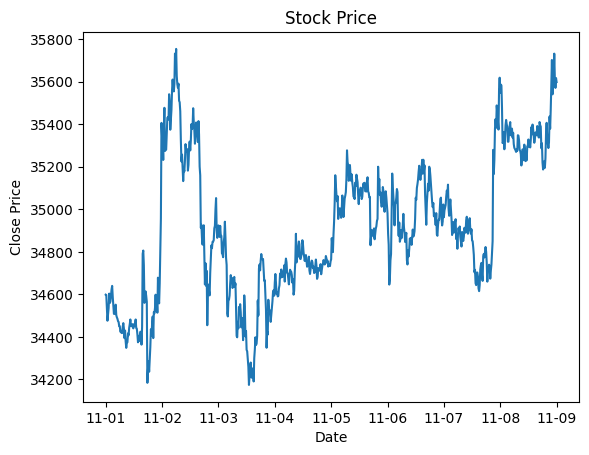

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2023-11-09')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

date_formatter = mdates.DateFormatter('%m-%d')

plt.gca().xaxis.set_major_formatter(date_formatter)

plt.plot(filtered_df['Date'], filtered_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price')

tooltip = mpld3.plugins.PointLabelTooltip(plt.gca(), labels=np.round(filtered_df['Close'], 2).astype(str).tolist())
mpld3.plugins.connect(plt.gcf(), tooltip)

<h3>
<b>
Функция для конвертации 15-и минутного тайм фрейма в более старший
</b>
</h3>

In [68]:
frames_for_15m = {"15m":1, "30m":2, "h":4, "4h":16, "12h":48, "d":96, "w":672, "m":2880}

def binanceConvert(time_frame, path_to_df, save_to_csv=False):
    cdf = pd.read_csv(path_to_df).copy()
    cdf['Date'] = pd.to_datetime(cdf['Date'])
    cdf.set_index('Date', inplace=True)

    resampled_df = cdf.resample(time_frame).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum',
        'Close Time': 'last',
        'Quote Asset Volume': 'sum',
        'Number of Trades': 'sum',
        'Taker Buy Base Asset Volume': 'sum',
        'Taker Buy Quote Asset Volume': 'sum'
    })
    if save_to_csv :
        with open(f"binance-bitcoin-{time_frame}.csv", "w") as file:
            file.write(resampled_df.reset_index()).to_csv()
    else:
        return resampled_df.reset_index()

---

In [32]:
def moving_avg (x, n):
    return pd.Series(x).rolling(window=n).mean().iloc[n-1:].values

print(len(moving_avg(filtered_df["Close"], 16)))
print(filtered_df["Close"])

754
217711    34598.60
217712    34596.93
217713    34538.47
217714    34475.98
217715    34507.70
            ...   
218475    35731.63
218476    35614.43
218477    35570.64
218478    35616.93
218479    35598.00
Name: Close, Length: 769, dtype: float64


In [ ]:
# НАХОЖДЕНИЕ ATH и ATL на промежутке


TMP_ATH_1 = 0
TMP_ATH_2 = 0
TMP_ATH_1_TIME = filtered_df["Date"][filtered_df.index[0]]
TMP_ATH_2_TIME = filtered_df["Date"][filtered_df.index[0]]

TMP_ATL_1 = 99999999
TMP_ATL_2 = 99999999
TMP_ATL_1_TIME = filtered_df["Date"][filtered_df.index[0]]
TMP_ATL_2_TIME = filtered_df["Date"][filtered_df.index[0]]

for i in range(filtered_df.index[0], filtered_df.index[-1]-1):
    current_price = filtered_df["Close"][i]
    current_time = filtered_df["Date"][i]
    if current_price >= TMP_ATH_1:
        TMP_ATH_1 = current_price
        TMP_ATH_1_TIME = current_time
    if current_price > TMP_ATH_2 and current_price != TMP_ATH_1:
        TMP_ATH_2 = current_price
        TMP_ATH_2_TIME = current_time
        
    if current_price <= TMP_ATL_1:
        TMP_ATL_1 = current_price
        TMP_ATL_1_TIME = current_time
    if current_price < TMP_ATL_2 and current_price != TMP_ATL_1:
        TMP_ATL_2 = current_price
        TMP_ATL_2_TIME = current_time
print(TMP_ATH_1, TMP_ATH_1_TIME)
print(TMP_ATH_2, TMP_ATH_2_TIME)
print(TMP_ATL_1, TMP_ATL_1_TIME)
print(TMP_ATL_2, TMP_ATL_2_TIME)
ATH_1_TIME = TMP_ATH_1_TIME
ATL_1_TIME = TMP_ATL_1_TIME
ATH_2_TIME = TMP_ATH_2_TIME
ATL_2_TIME = TMP_ATL_2_TIME

35753.83 2023-11-02 06:00:00
35731.63 2023-11-08 23:00:00
34174.19 2023-11-03 13:00:00
34190.42 2023-11-03 15:00:00


In [ ]:
#TODO: НУЖНО НАЙТИ СРЕДНЮЮ ДАТУ МЕЖДУ ATH_1 и ATL_1 + для ATH_2 и ATL_2
#TODO: Построить эти точки на графике

ath_1_time_int = int((pd.Timestamp(ATH_1_TIME)).timestamp())
ath_2_time_int = int((pd.Timestamp(ATH_2_TIME)).timestamp())
atl_1_time_int = int((pd.Timestamp(ATL_1_TIME)).timestamp())
atl_2_time_int = int((pd.Timestamp(ATL_2_TIME)).timestamp())

point1_int = (ath_1_time_int + atl_1_time_int) / 2
point2_int = (ath_2_time_int + atl_2_time_int) / 2

point1_timestamp = datetime.datetime.fromtimestamp(point1_int).strftime('%Y-%m-%d %H:%M:%S')
point2_timestamp = datetime.datetime.fromtimestamp(point2_int).strftime('%Y-%m-%d %H:%M:%S')

# print(point1_timestamp)
# print(point2_timestamp)
print(atl_1_time_int - atl_2_time_int)
print(ath_1_time_int - ath_2_time_int)

-7200
-579600


In [9]:
mean_trades = np.mean(df["Number of Trades"])
#calculate moving average using previous 3 time periods
n = 16


In [ ]:
count_of_trades = 0
# for i in range(filtered_df.index[0], filtered_df.index[-1]-1):
#     sum_of_trades = filtered_df["Number of Trades"][i]
#     count_of_trades += 1
# avg_trades = sum_of_trades/count_of_trades
# print(avg_trades)
print(max(filtered_df["Number of Trades"]))
print(min(filtered_df["Number of Trades"]))
print(np.mean(filtered_df["Number of Trades"]))
aboba = (np.average(dfiltered_nt))
print(aboba)
# print(mean_trades/(10 * 1000))

87370
3762
12337.507152145643
12270.841263262599


In [ ]:
for i in range(filtered_df.index[0], filtered_df.index[-1]-1):
    current_price = filtered_df["Close"][i]
    current_time = filtered_df["Date"][i]
    if current_price >= TMP_ATH_1:
        TMP_ATH_1 = current_price
        TMP_ATH_1_TIME = current_time
    if current_price > TMP_ATH_2 and current_price != TMP_ATH_1:
        TMP_ATH_2 = current_price
        TMP_ATH_2_TIME = current_time
        
    if current_price <= TMP_ATL_1:
        TMP_ATL_1 = current_price
        TMP_ATL_1_TIME = current_time
    if current_price < TMP_ATL_2 and current_price != TMP_ATL_1:
        TMP_ATL_2 = current_price
        TMP_ATL_2_TIME = current_time

In [49]:
with open("../../datasets/h/binance-bitcoin-h.csv", "w") as file:
    file.write((binanceConvert("w", df)).to_csv())